1. Fashion-MNIST 데이터 로딩
2. 데이터 전처리 코드 작성 
    (이미지 리사이징, 정규화, rotation, flip 순서로)
3. 사용할 모델 : CNN + Pooling * 3회 + FC layer 추가 (마지막 전에 Dropout 넣자)
4. Optimizer : adam, loss function : sparse categorical crossentropy
5. 모든 layer의 activation function은 relu, 마지막은 softmax
6. 모델 구성은 tf.keras.Model로 해보자
7. input_shape = 32*32, batch_size도 default, epoch는 일단 50으로해서 history 파악

## Fashion-MNIST 데이터 로딩 & 확인

In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 픽셀 값을 0~1 사이로 정규화합니다.
# x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

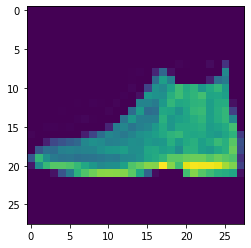

In [ ]:
plt.imshow(x_test[0]) #255로 갈수록 하얀색 흑백데이터

## 데이터 전처리 코드 작성 (리사이징, 정규화, 회전, 반전)

In [ ]:
#

data_preprocess = tf.keras.models.Sequential(
    [
     tf.keras.layers.experimental.preprocessing.Resizing(32,32),
     tf.keras.layers.experimental.preprocessing.Rescaling(1./255.0),
     tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
     tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

## 3. 사용할 모델 : CNN + Pooling * 3회 + FC layer 추가 (마지막 전에 Dropout 넣자)

In [ ]:
#마지막 예측을 위해서 10으로 softmax함수를 쓴다.
base_model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,1)),
     tf.keras.layers.MaxPooling2D((2,2)),
     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D((2,2)),
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D((2,2)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(10, activation='softmax')    
    ]
)

In [ ]:
base_model.build()

In [ ]:
base_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)             

## 7. (선택) tf.keras.Model 활용해보기

In [ ]:
# 전처리 하기 전 실제 넣어주는 input shape은 28x28x1

inputs1 = tf.keras.Input(shape=(28,28,1))
x1 = data_preprocess(inputs1)
outputs1 = base_model(x1)
model1 = tf.keras.Model(inputs1, outputs1)

In [ ]:
model1.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_11 (Sequential)   (None, 32, 32, 1)         0         
_________________________________________________________________
sequential_12 (Sequential)   (None, 10)                57482     
Total params: 57,482
Trainable params: 57,482
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 전처리 하기 전 실제 넣어주는 input shape은 28x28x1
inputs = tf.keras.Input(shape=(28,28,1))
# 전처리 과정 
x = tf.keras.layers.experimental.preprocessing.Resizing(32,32)(inputs)
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.0)(x)
x = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')(x)
x = tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)(x)
# model 
x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
# output
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model2 = tf.keras.Model(inputs, outputs)

In [ ]:
model2.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
resizing_8 (Resizing)        (None, 32, 32, 1)         0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 32, 32, 1)         0         
_________________________________________________________________
random_flip_7 (RandomFlip)   (None, 32, 32, 1)         0         
_________________________________________________________________
random_rotation_7 (RandomRot (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 16)      

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=(['accuracy']))

In [ ]:
hisotyr = model2.fit(x_train, y_train, epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7642 - accuracy: 0.7141 - val_loss: 0.5416 - val_accuracy: 0.7976
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5462 - accuracy: 0.7961 - val_loss: 0.5229 - val_accuracy: 0.7957
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4877 - accuracy: 0.8207 - val_loss: 0.4408 - val_accuracy: 0.8386
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4440 - accuracy: 0.8364 - val_loss: 0.4353 - val_accuracy: 0.8428
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4135 - accuracy: 0.8465 - val_loss: 0.4010 - val_accuracy: 0.8520
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3932 - accuracy: 0.8559 - val_loss: 0.4148 - val_accuracy: 0.8470
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3793 - accuracy: 0.8598 - val_loss: 0.4057 - val_accuracy:

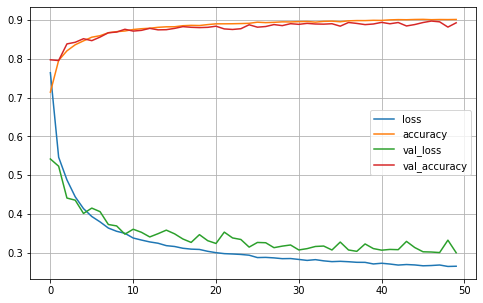

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hisotyr.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=(['accuracy']))
hisotyr2 = model2.fit(x_train, y_train, epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2400 - accuracy: 0.9115 - val_loss: 0.2872 - val_accuracy: 0.9004
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2331 - accuracy: 0.9129 - val_loss: 0.2859 - val_accuracy: 0.9015
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2295 - accuracy: 0.9139 - val_loss: 0.2845 - val_accuracy: 0.9006
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2275 - accuracy: 0.9166 - val_loss: 0.2879 - val_accuracy: 0.9017
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2257 - accuracy: 0.9158 - val_loss: 0.2871 - val_accuracy: 0.8998
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2283 - accuracy: 0.9154 - val_loss: 0.2845 - val_accuracy: 0.9030
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2254 - accuracy: 0.9161 - val_loss: 0.2876 - val_accuracy:

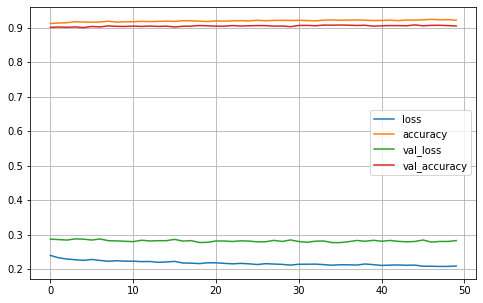

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hisotyr2.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

## 학습을 언제까지 시켜야할지 모르겠다?

In [ ]:
# pationce 동안 monitor 값이 개선되지 않으면 학습을 종료한다. 
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5) #val_loss가 연속으로 5번 개선이 없으면 학습을 종료한다.
#callback_save = tf.keras.callbacks.ModelCheckpoint(filepath='weight.{epoch:02d}-{val_loss:.2f}.hdf5',)
#callback_save_best = tf.keras.callbacks.

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=(['accuracy']))
hisotyr3 = model2.fit(x_train, y_train, epochs=50, validation_data=(x_test,y_test), callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2064 - accuracy: 0.9230 - val_loss: 0.2833 - val_accuracy: 0.9044
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2051 - accuracy: 0.9226 - val_loss: 0.2830 - val_accuracy: 0.9064
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2076 - accuracy: 0.9218 - val_loss: 0.2820 - val_accuracy: 0.9032
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2076 - accuracy: 0.9212 - val_loss: 0.2831 - val_accuracy: 0.9038
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2080 - accuracy: 0.9229 - val_loss: 0.2795 - val_accuracy: 0.9071
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2079 - accuracy: 0.9226 - val_loss: 0.2788 - val_accuracy: 0.9060
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2068 - accuracy: 0.9230 - val_loss: 0.2803 - val_accuracy:

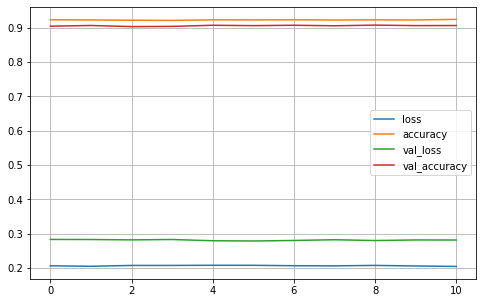

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hisotyr3.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()